In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
sns.set()

numerical_example = 'lorenz'

json_file = sorted(glob.glob(f"../data/{numerical_example}-table/*json"))[-1]
json_file

'../data/lorenz-table/results-lorenz-2021-11-15--05-37.json'

In [107]:
results_disease = pd.read_json(json_file)
results_disease["side_info"] = results_disease.side_info.apply(len)
results_disease["samples"] = results_disease.num_trajectories * results_disease.num_samples
for col in ("test", "training", "box"):
    results_disease[col+"_maxed"] = np.where(results_disease[col] < 1., results_disease[col], 1.)

results_disease.head()

,num_trajectories,training,num_samples,deg,training_x,noise_level,side_info,training_xdot,learned_p,box,obj_value,test,samples,test_maxed,training_maxed,box_maxed
0,1,7.206784e-12,10,2,"[[6.791074260357776, 8.28413482900036, -3.5300...",0.0,0,"[[14.930605686425835, 205.83893915998934, 65.6...","[{'a': [-7.627024649297138e-16, -3.59578924067...",8.693984e-12,-0.000000e+00,2.163689e-11,10,2.163689e-11,7.206784e-12,8.693984e-12
1,1,NaN,10,3,"[[6.791074260357776, 8.28413482900036, -3.5300...",0.0,0,"[[14.930605686425835, 205.83893915998934, 65.6...","[{'a': [-0.15302657518047202, 0.03944135580147...",2.227558e+02,2.700394e-09,NaN,10,1.000000e+00,1.000000e+00,1.000000e+00
2,1,NaN,10,4,"[[6.791074260357776, 8.28413482900036, -3.5300...",0.0,0,"[[14.930605686425835, 205.83893915998934, 65.6...","[{'a': [0.00135998810425, 0.001475951738366000...",1.309638e+02,5.520635e-14,NaN,10,1.000000e+00,1.000000e+00,1.000000e+00
3,1,NaN,10,5,"[[6.791074260357776, 8.28413482900036, -3.5300...",0.0,0,"[[14.930605686425835, 205.83893915998934, 65.6...","[{'a': [3.844164642950326e-05, 6.4194102663946...",1.100865e+02,1.332882e-14,NaN,10,1.000000e+00,1.000000e+00,1.000000e+00
4,1,NaN,10,6,"[[6.791074260357776, 8.28413482900036, -3.5300...",0.0,0,"[[14.930605686425835, 205.83893915998934, 65.6...","[{'a': [5.405418276923542e-06, 6.3491633702442...",1.260590e+02,3.252321e-10,NaN,10,1.000000e+00,1.000000e+00,1.000000e+00


In [113]:
for deg in (2, 3, 4, 5):
    tbl_as_latex = results_disease.copy()
    tbl_as_latex = tbl_as_latex[tbl_as_latex.num_samples == 10]
    tbl_as_latex = tbl_as_latex[tbl_as_latex.deg == deg]
    tbl_as_latex = tbl_as_latex[["num_trajectories", "noise_level", "side_info", "obj_value", "test", "box", ]].round(3)
    tbl_as_latex.groupby(["noise_level", "num_trajectories", "side_info"]).agg({"obj_value": "last"})
    tbl_as_latex_index = tbl_as_latex.index.copy()
    tbl_as_latex = tbl_as_latex.reset_index()
    tbl_as_latex = tbl_as_latex.pivot(values=["obj_value", "box", "test", ], columns="side_info", 
                                      index=[ "noise_level", "num_trajectories", ])
    tbl_as_latex.columns.names = ["", "side information:"]
    tbl_as_latex.to_excel(f"../data/xlsx/{numerical_example}_{deg}_.xlsx")
    print(f"degree = {deg}")
    display(tbl_as_latex)
    

degree = 2


obj_value                   box                   \
side information:                    0      1      2       0       1        2   
noise_level num_trajectories                                                    
0.000       1                   -0.000  0.000  0.000   0.000   0.000    0.000   
            2                    0.000  0.000  0.000   0.000   0.000    0.000   
            3                    0.000  0.000  0.000   0.000   0.000    0.000   
            4                   -0.000  0.000  0.000   0.000   0.000    0.000   
0.001       1                   -0.000  0.000  0.001   0.245   0.201    0.121   
            2                    0.001  0.001  0.001   0.002   0.002    0.002   
            3                    0.001  0.001  0.001   0.001   0.001    0.000   
            4                    0.001  0.001  0.001   0.001   0.000    0.000   
0.010       1                   -0.000  0.003  0.000   2.448   2.007  111.389   
            2                    0.007  0.007  0.007   0.018   0.016    0.016   
            3                    0.007  0.007  0.008   0.007   0.008    0.004   
            4                    0.007  0.007  0.008   0.005   0.004    0.004   
0.100       1                   -0.000  0.027  0.000  24.480  20.067  111.389   
            2                    0.069  0.071  0.071   0.182   0.158    0.155   
            3                    0.071  0.073  0.076   0.072   0.081    0.041   
            4                    0.072  0.074  0.077   0.052   0.041    0.036   

                                test                   
side information:                  0       1        2  
noise_level num_trajectories                           
0.000       1                  0.000   0.000    0.000  
            2                  0.000   0.000    0.000  
            3                  0.000   0.000    0.000  
            4                  0.000   0.000    0.000  
0.001       1                  0.607   0.611    0.385  
            2                  0.020   0.006    0.008  
            3                  0.008   0.006    0.003  
            4                  0.006   0.003    0.003  
0.010       1                  6.049   6.135  138.582  
            2                  0.200   0.062    0.074  
            3                  0.080   0.060    0.027  
            4                  0.062   0.025    0.033  
0.100       1                 61.841  74.200  138.582  
            2                  1.991   0.616    0.731  
            3                  0.802   0.601    0.277  
            4                  0.617   0.253    0.324

degree = 3


obj_value                     box            \
side information:                    0      1      2         0         1   
noise_level num_trajectories                                               
0.000       1                    0.000  0.000  0.000   222.756   222.759   
            2                    0.000  0.000  0.000   908.362   753.827   
            3                   -0.000  0.000  0.000     0.000     0.000   
            4                    0.000  0.000  0.000     0.000     0.000   
0.001       1                    0.000  0.000  0.000   222.783   222.787   
            2                    0.000  0.000  0.001   425.683   162.541   
            3                    0.001  0.001  0.000     0.007     0.007   
            4                    0.001  0.001  0.001     0.003     0.003   
0.010       1                    0.000  0.000  0.004   223.030   223.033   
            2                    0.002  0.002  0.005   486.093   643.805   
            3                    0.005  0.005  0.006     0.070     0.074   
            4                    0.006  0.006  0.006     0.034     0.033   
0.100       1                    0.000  0.000  0.037   225.526   225.530   
            2                    0.019  0.024  0.043  7642.344  1271.025   
            3                    0.051  0.055  0.057     0.703     0.739   
            4                    0.058  0.060  0.063     0.343     0.327   

                                           test                 
side information:                    2        0      1       2  
noise_level num_trajectories                                    
0.000       1                  215.056      NaN    NaN     NaN  
            2                  220.348      NaN    NaN     NaN  
            3                    0.000    0.000  0.000   0.000  
            4                    0.000    0.000  0.000   0.000  
0.001       1                  215.079      NaN    NaN     NaN  
            2                   90.257      NaN    NaN     NaN  
            3                    0.038    0.032  0.034   0.107  
            4                    0.003    0.018  0.023   0.029  
0.010       1                  215.273      NaN    NaN     NaN  
            2                   11.723  386.471    NaN  22.132  
            3                    0.097    0.315  0.337   0.417  
            4                    0.029    0.179  0.228   0.270  
0.100       1                  217.375      NaN    NaN     NaN  
            2                 3223.840      NaN    NaN     NaN  
            3                    0.717    3.114  3.217   2.804  
            4                    0.297    1.763  2.246   2.152

degree = 4


obj_value                     box            \
side information:                    0      1      2         0         1   
noise_level num_trajectories                                               
0.000       1                    0.000  0.000  0.000   130.964   130.964   
            2                    0.000  0.000  0.000   325.896   325.895   
            3                    0.000  0.000  0.000  1446.270  1408.347   
            4                    0.000  0.000  0.000     0.000     0.000   
0.001       1                    0.000  0.000  0.000   130.963   130.963   
            2                    0.000  0.000  0.000   325.954   325.953   
            3                    0.000  0.000  0.000  1446.814  1413.993   
            4                    0.000  0.000  0.000     0.148     0.117   
0.010       1                    0.000  0.000  0.000   130.956   130.956   
            2                    0.000  0.000  0.000   326.485   326.484   
            3                    0.000  0.000  0.000  1458.770  1430.505   
            4                    0.003  0.003  0.001     1.481     1.174   
0.100       1                    0.000  0.000  0.000   130.883   130.883   
            2                    0.000  0.000  0.000   332.899   332.897   
            3                    0.000  0.000  0.010  1653.774  1609.519   
            4                    0.033  0.034  0.029    14.805    11.742   

                                         test                  
side information:                    2      0       1       2  
noise_level num_trajectories                                   
0.000       1                 1029.693    NaN     NaN     NaN  
            2                  715.847    NaN     NaN     NaN  
            3                 1545.701    NaN     NaN     NaN  
            4                   12.180   0.00   0.000  51.621  
0.001       1                 1028.124    NaN     NaN     NaN  
            2                  519.262    NaN     NaN     NaN  
            3                 1447.124    NaN     NaN     NaN  
            4                   52.277   1.41   1.048     NaN  
0.010       1                 1000.189    NaN     NaN     NaN  
            2                  582.388    NaN     NaN     NaN  
            3                 1487.395    NaN     NaN     NaN  
            4                   87.526  14.25  11.144     NaN  
0.100       1                  942.692    NaN     NaN     NaN  
            2                 1535.871    NaN     NaN     NaN  
            3                 2459.803    NaN     NaN     NaN  
            4                   34.976    NaN  36.068     NaN

degree = 5


obj_value                 box            \
side information:                    0    1    2         0         1   
noise_level num_trajectories                                           
0.000       1                      0.0  0.0  0.0   110.086   110.086   
            2                      0.0  0.0  0.0   272.575   272.575   
            3                      0.0  0.0  0.0  3690.859  3692.753   
            4                      0.0  0.0  0.0  1032.058  1029.376   
0.001       1                      0.0  0.0  0.0   110.087   110.087   
            2                      0.0  0.0  0.0   272.562   272.562   
            3                      0.0  0.0  0.0  3690.516  3692.585   
            4                      0.0  0.0  0.0  1043.624  1049.173   
0.010       1                      0.0  0.0  0.0   110.090   110.090   
            2                      0.0  0.0  0.0   272.444   272.444   
            3                      0.0  0.0  0.0  3689.391  3691.135   
            4                      0.0  0.0  0.0  1037.988  1021.968   
0.100       1                      0.0  0.0  0.0   110.125   110.125   
            2                      0.0  0.0  0.0   271.440   271.440   
            3                      0.0  0.0  0.0  3677.108  3679.426   
            4                      0.0  0.0  0.0   985.782  1010.520   

                                        test          
side information:                     2    0   1   2  
noise_level num_trajectories                          
0.000       1                 11743.255  NaN NaN NaN  
            2                   936.852  NaN NaN NaN  
            3                  3179.215  NaN NaN NaN  
            4                   959.626  NaN NaN NaN  
0.001       1                 11704.235  NaN NaN NaN  
            2                  1185.573  NaN NaN NaN  
            3                  3379.309  NaN NaN NaN  
            4                   956.952  NaN NaN NaN  
0.010       1                 11752.284  NaN NaN NaN  
            2                  1086.608  NaN NaN NaN  
            3                  3873.670  NaN NaN NaN  
            4                  1130.254  NaN NaN NaN  
0.100       1                 11276.784  NaN NaN NaN  
            2                  6456.922  NaN NaN NaN  
            3                  3001.431  NaN NaN NaN  
            4                   984.944  NaN NaN NaN

In [117]:
tbl_as_latex = results_disease.copy()
tbl_as_latex = tbl_as_latex[tbl_as_latex.num_samples == 10]
tbl_as_latex = tbl_as_latex[["deg", "num_trajectories", "noise_level", "side_info", "obj_value", "test", "box", ]].round(3)
tbl_as_latex.groupby(["deg", "noise_level", "num_trajectories", "side_info"]).agg({"obj_value": "last"})
tbl_as_latex_index = tbl_as_latex.index.copy()
tbl_as_latex = tbl_as_latex.reset_index()
tbl_as_latex = tbl_as_latex.pivot(values=["obj_value", "box", "test", ], columns="side_info", 
                                  index=[ "deg", "noise_level", "num_trajectories", ])
tbl_as_latex.columns.names = ["", "side information:"]
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(tbl_as_latex)


obj_value                     box            \
side information:                        0      1      2         0         1   
deg noise_level num_trajectories                                               
2   0.000       1                   -0.000  0.000  0.000     0.000     0.000   
                2                    0.000  0.000  0.000     0.000     0.000   
                3                    0.000  0.000  0.000     0.000     0.000   
                4                   -0.000  0.000  0.000     0.000     0.000   
    0.001       1                   -0.000  0.000  0.001     0.245     0.201   
                2                    0.001  0.001  0.001     0.002     0.002   
                3                    0.001  0.001  0.001     0.001     0.001   
                4                    0.001  0.001  0.001     0.001     0.000   
    0.010       1                   -0.000  0.003  0.000     2.448     2.007   
                2                    0.007  0.007  0.007     0.018     0.016   
                3                    0.007  0.007  0.008     0.007     0.008   
                4                    0.007  0.007  0.008     0.005     0.004   
    0.100       1                   -0.000  0.027  0.000    24.480    20.067   
                2                    0.069  0.071  0.071     0.182     0.158   
                3                    0.071  0.073  0.076     0.072     0.081   
                4                    0.072  0.074  0.077     0.052     0.041   
3   0.000       1                    0.000  0.000  0.000   222.756   222.759   
                2                    0.000  0.000  0.000   908.362   753.827   
                3                   -0.000  0.000  0.000     0.000     0.000   
                4                    0.000  0.000  0.000     0.000     0.000   
    0.001       1                    0.000  0.000  0.000   222.783   222.787   
                2                    0.000  0.000  0.001   425.683   162.541   
                3                    0.001  0.001  0.000     0.007     0.007   
                4                    0.001  0.001  0.001     0.003     0.003   
    0.010       1                    0.000  0.000  0.004   223.030   223.033   
                2                    0.002  0.002  0.005   486.093   643.805   
                3                    0.005  0.005  0.006     0.070     0.074   
                4                    0.006  0.006  0.006     0.034     0.033   
    0.100       1                    0.000  0.000  0.037   225.526   225.530   
                2                    0.019  0.024  0.043  7642.344  1271.025   
                3                    0.051  0.055  0.057     0.703     0.739   
                4                    0.058  0.060  0.063     0.343     0.327   
4   0.000       1                    0.000  0.000  0.000   130.964   130.964   
                2                    0.000  0.000  0.000   325.896   325.895   
                3                    0.000  0.000  0.000  1446.270  1408.347   
                4                    0.000  0.000  0.000     0.000     0.000   
    0.001       1                    0.000  0.000  0.000   130.963   130.963   
                2                    0.000  0.000  0.000   325.954   325.953   
                3                    0.000  0.000  0.000  1446.814  1413.993   
                4                    0.000  0.000  0.000     0.148     0.117   
    0.010       1                    0.000  0.000  0.000   130.956   130.956   
                2                    0.000  0.000  0.000   326.485   326.484   
                3                    0.000  0.000  0.000  1458.770  1430.505   
                4                    0.003  0.003  0.001     1.481     1.174   
    0.100       1                    0.000  0.000  0.000   130.883   130.883   
                2                    0.000  0.000  0.000   332.899   332.897   
                3                    0.000  0.000  0.010  1653.774  1609.519   
                4                

In [111]:
tbl_as_latex

obj_value                 box            \
side information:                    0    1    2         0         1   
noise_level num_trajectories                                           
0.000       1                      0.0  0.0  0.0   110.086   110.086   
            2                      0.0  0.0  0.0   272.575   272.575   
            3                      0.0  0.0  0.0  3690.859  3692.753   
            4                      0.0  0.0  0.0  1032.058  1029.376   
0.001       1                      0.0  0.0  0.0   110.087   110.087   
            2                      0.0  0.0  0.0   272.562   272.562   
            3                      0.0  0.0  0.0  3690.516  3692.585   
            4                      0.0  0.0  0.0  1043.624  1049.173   
0.010       1                      0.0  0.0  0.0   110.090   110.090   
            2                      0.0  0.0  0.0   272.444   272.444   
            3                      0.0  0.0  0.0  3689.391  3691.135   
            4                      0.0  0.0  0.0  1037.988  1021.968   
0.100       1                      0.0  0.0  0.0   110.125   110.125   
            2                      0.0  0.0  0.0   271.440   271.440   
            3                      0.0  0.0  0.0  3677.108  3679.426   
            4                      0.0  0.0  0.0   985.782  1010.520   

                                        test          
side information:                     2    0   1   2  
noise_level num_trajectories                          
0.000       1                 11743.255  NaN NaN NaN  
            2                   936.852  NaN NaN NaN  
            3                  3179.215  NaN NaN NaN  
            4                   959.626  NaN NaN NaN  
0.001       1                 11704.235  NaN NaN NaN  
            2                  1185.573  NaN NaN NaN  
            3                  3379.309  NaN NaN NaN  
            4                   956.952  NaN NaN NaN  
0.010       1                 11752.284  NaN NaN NaN  
            2                  1086.608  NaN NaN NaN  
            3                  3873.670  NaN NaN NaN  
            4                  1130.254  NaN NaN NaN  
0.100       1                 11276.784  NaN NaN NaN  
            2                  6456.922  NaN NaN NaN  
            3                  3001.431  NaN NaN NaN  
            4                   984.944  NaN NaN NaN

In [103]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 15.3 MB/s eta 0:00:01


In [99]:
s = tbl_as_latex.style

index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}

headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
slice_ = [('box', 0),
        ('box', 1),
        ('box', 2),
        ('box', 3)]
s.set_table_styles([index_names,  ])\
 .set_caption(f"Degree {2}")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top; font-size:1.25em;'
 }], overwrite=False)\
 .set_properties(**{'background-color': '#ffffff'}, subset=slice_)
 #.set_table_styles([{'selector' : 'caption', 'props' : [('border', '2px solid green')]}])


OSError: Chrome executable not able to be found on your machine

In [316]:
tbl_as_latex = results_disease.copy()
tbl_as_latex.noise_level = tbl_as_latex.noise_level.astype(str)#.str.replace("0.001", "thousand", regex=False)\
#                                                                     .replace("0.01", "hundred", regex=False)\
#                                                                     .replace("0.0", "zero", regex=False)\
#                                                                     .replace("0.1", "ten", regex=False)
tbl_as_latex.side_info = tbl_as_latex.side_info.replace(0, "LSQ").replace(3, "Ours")                                                           
tbl_as_latex = tbl_as_latex[tbl_as_latex.samples < 40]
tbl_as_latex = tbl_as_latex[(tbl_as_latex.side_info == "LSQ") | (tbl_as_latex.side_info == "Ours")]

tbl_as_latex = tbl_as_latex.groupby(["samples", "noise_level", "deg", "side_info"])\
[["training", "test", "box", "obj_value"]].mean()
tbl_as_latex_index = tbl_as_latex.index.copy()
tbl_as_latex = tbl_as_latex.reset_index()

tbl_as_latex = tbl_as_latex.pivot(values=["obj_value", "training", "test", "box"], columns="side_info", 
                                  index=["samples", "noise_level", "deg"])
#tbl_as_latex.index = tbl_as_latex_index
# tbl_as_latex = tbl_as_latex.to_latex().replace("zero", "$0$")\
#                                           .replace("ten", "$10^{-1}$")\
#                                           .replace("hundred", "$10^{-2}$")\
#                                           .replace("NaN", "$\infty$")
# open(f"../data/{numerical_example}_table.tex", "w").write(tbl_as_latex)
# print(tbl_as_latex)
tbl_as_latex.round(2).replace(float("NaN"), float("inf"))#.reset_index()

obj_value       training         test         \
side_info                     LSQ  Ours      LSQ   Ours   LSQ   Ours   
samples noise_level deg                                                
10      0.0         2        0.00  0.00     0.00   0.00  0.00   0.01   
                    3        0.00  0.00     0.00   0.00  0.01   0.00   
                    4        0.00  0.00     0.00   0.00  0.00   0.00   
                    5        0.00  0.00     0.00   0.00  0.00   0.00   
                    6        0.00  0.00     0.00   0.00  0.00   0.00   
        0.001       2        0.00  0.00     0.00   0.00   inf   0.01   
                    3        0.00  0.00      inf   0.00   inf   0.04   
                    4        0.00  0.00      inf   0.00   inf   0.11   
                    5        0.00  0.00      inf   0.04   inf   0.71   
                    6        0.00  0.00      inf   0.02   inf   0.67   
        0.01        2        0.01  0.01     0.00   0.00   inf   0.01   
                    3        0.00  0.01      inf   0.02   inf   0.37   
                    4        0.01  0.01      inf   0.03   inf   0.80   
                    5        0.01  0.01      inf   0.01   inf   7.83   
                    6        0.01  0.01      inf   0.01   inf   7.20   
        0.1         2        0.08  0.10      inf   0.02   inf   0.10   
                    3        0.00  0.09      inf   0.03   inf   3.73   
                    4        0.06  0.09      inf   0.02   inf   7.67   
                    5        0.06  0.09      inf  19.98   inf    inf   
                    6        0.06  0.09      inf    inf   inf    inf   
20      0.0         2        0.00  0.00     0.00   0.00  0.00   0.01   
                    3        0.00  0.00     0.00   0.00  0.00   0.00   
                    4        0.00  0.00     0.00   0.00  0.01   0.00   
                    5        0.00  0.00     0.00   0.00  0.00   0.00   
                    6        0.00  0.00     0.00   0.00  0.00   0.00   
        0.001       2        0.00  0.00     0.00   0.00  0.00   0.01   
                    3        0.00  0.00     0.01   0.01   inf   0.04   
                    4        0.00  0.00     0.00   0.01   inf   0.07   
                    5        0.00  0.00     0.00   0.06   inf   0.27   
                    6        0.00  0.00     0.00   0.10   inf   1.23   
        0.01        2        0.01  0.01     0.00   0.00  0.04   0.01   
                    3        0.01  0.01     0.01   0.01   inf   0.31   
                    4        0.01  0.01      inf   0.02   inf   0.56   
                    5        0.01  0.01      inf   0.01   inf   2.62   
                    6        0.01  0.01      inf   0.01   inf  10.83   
        0.1         2        0.09  0.09     0.18   0.02   inf   0.04   
                    3        0.08  0.09     0.03   0.04   inf   3.06   
                    4        0.08  0.09      inf   0.08   inf   5.13   
                    5        0.07  0.09      inf   0.03   inf  21.36   
                    6        0.07  0.08      inf   0.03   inf    inf   
30      0.0         2        0.00  0.00     0.00   0.00  0.00   0.01   
                    3        0.00  0.00     0.00   0.00  0.00   0.00   
                    4        0.00  0.00     0.00   0.00  0.00   0.00   
                    5        0.00  0.00     0.00   0.00  0.00   0.00   
                    6        0.00  0.00     0.00   0.00  0.00   0.00   
        0.001       2        0.00  0.00     0.00   0.00  0.00   0.01   
                    3        0.00  0.00     0.01   0.00   inf   0.01   
                    4        0.00  0.00      inf   0.00   inf   0.02   
                    5        0.00  0.00      inf   0.00   inf   0.15   
                    6        0.00  0.00      inf   0.00   inf   1.84   
        0.01        2        0.01  0.01     0.00   0.00  0.01   0.01   
                    3        0.01  0.01      inf   0.00   inf   0.02   
                    4        0.01  0.01      inf   0.00   inf   

In [309]:
tbl_as_latex.side_info.str.contains("LSQ").describe()

count      160
unique       2
top       True
freq        80
Name: side_info, dtype: object

<AxesSubplot:xlabel='test_maxed', ylabel='Count'>

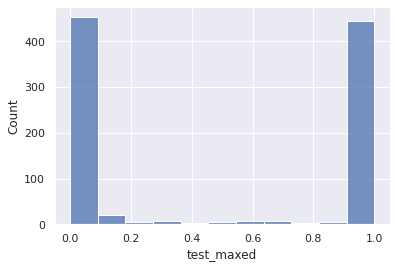

In [184]:
sns.histplot(results_disease.test_maxed)

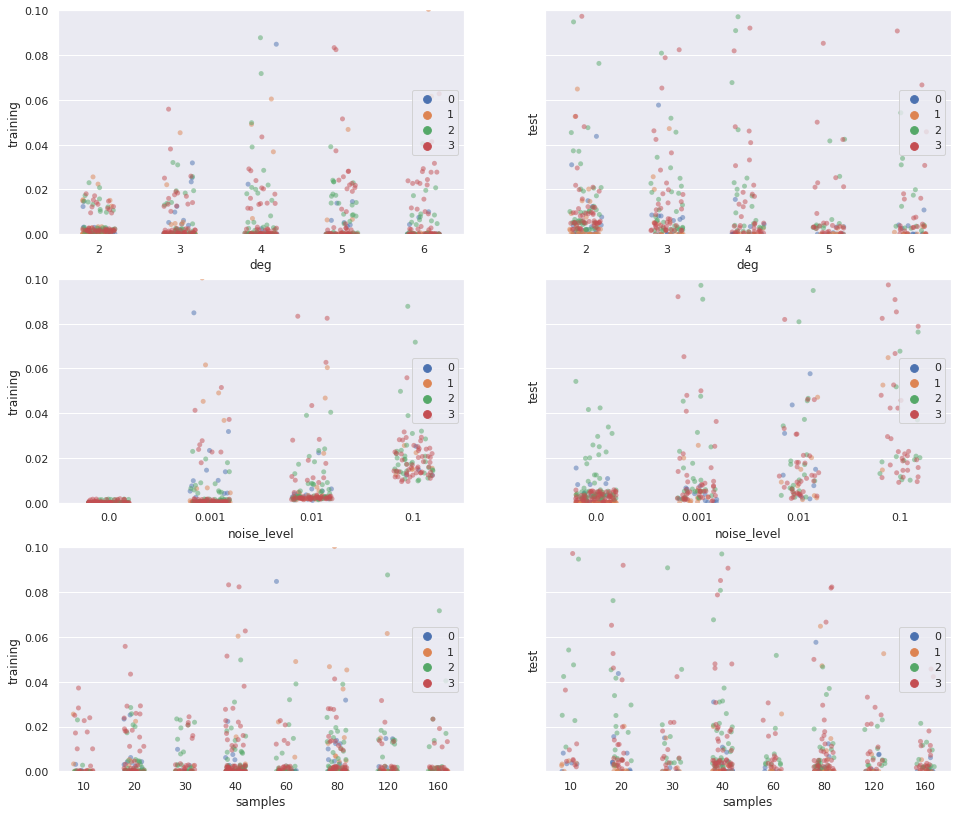

In [191]:
fig, axes = plt.subplots(figsize=(16, 14), ncols=2, nrows=3, sharey=True)


for i, feature in enumerate(("deg", "noise_level", "samples")):
    sns.stripplot(x=feature, y="training",  hue="side_info", 
                  jitter=0.2,
                  alpha=.5,
                data=results_disease, ax=axes[i, 0])
    sns.stripplot(x=feature, y="test",  hue="side_info", 
                  #dodge=True,
                  jitter=0.2,
                  alpha=.5,
                data=results_disease, ax=axes[i, 1])


for ax in axes.flatten():
    ax.set_ylim(0, .1)
    ax.legend(loc='center right')

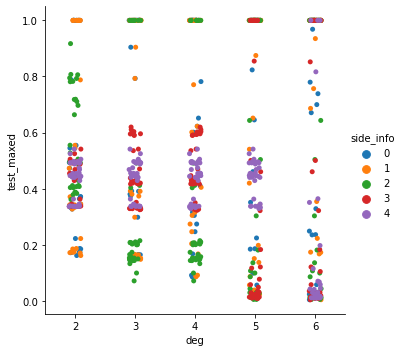

In [130]:
sns.catplot(x="deg", y="test_maxed",  hue="side_info", 
            #kind="swarm", 
            data=results_disease)

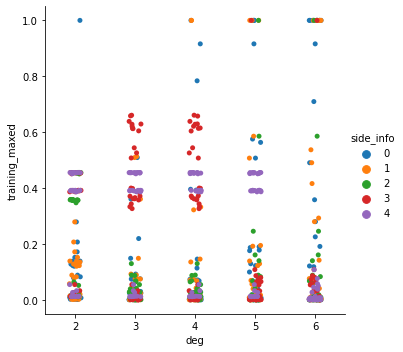

In [131]:
sns.catplot(x="deg", y="training_maxed",  hue="side_info", 
            #kind="swarm", 
            data=results_disease)

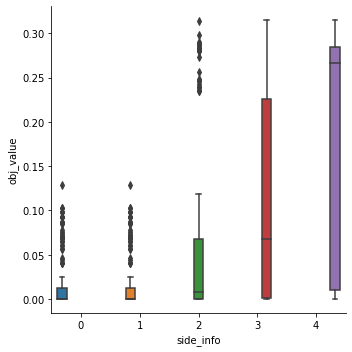

In [132]:
sns.catplot(x="side_info", y="obj_value",  hue="side_info", 
            kind="box", 
            data=results_disease)

(0.0, 0.05)

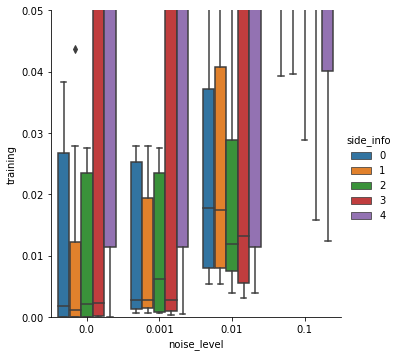

In [133]:
sns.catplot(x="noise_level", y="training",  hue="side_info", 
            kind="box", 
            data=results_disease)
plt.ylim(0, .05)

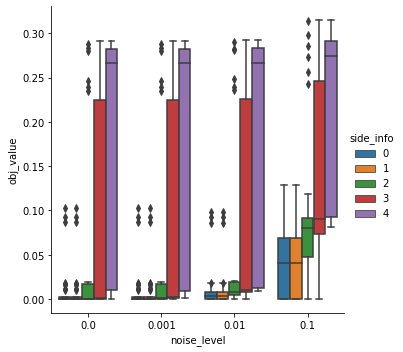

In [134]:
sns.catplot(x="noise_level", y="obj_value",  hue="side_info", 
            kind="box", 
            data=results_disease)

(0.0, 1.0)

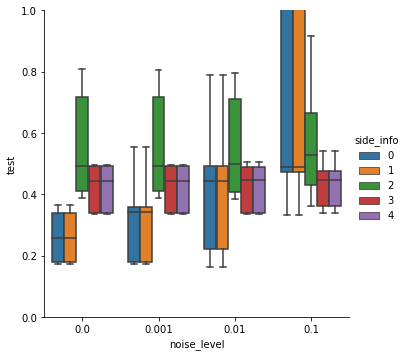

In [135]:
sns.catplot(x="noise_level", y="test",  hue="side_info", 
            kind="box", 
            data=results_disease[results_disease.deg < 3])
plt.ylim(0, 1)